In [45]:
from statistics import *
import numpy as np
import math
import operator
import itertools

# Initialize

In [46]:
def norm_raw(x):
    x = np.array(x)
    x_mean = np.mean(x)
    x_sigma = np.std(x)
    return [(i-x_mean) / x_sigma if x_sigma != 0 else 0 for i in x]

#"2018-05-16", "2018-05-17","2018-05-18","2018-05-19", "2018-05-20", "2018-05-21", "2018-05-22", "2018-05-23", "2018-05-24", "2018-05-25", "2018-05-26", "2018-05-27", 
DATE = ["2018-05-15", "2018-05-16", "2018-05-17","2018-05-18","2018-05-19", "2018-05-20", "2018-05-21", "2018-05-22", "2018-05-23", "2018-05-24", "2018-05-25", "2018-05-26", "2018-05-27", "2018-05-28","2018-05-29","2018-05-30", "2018-05-31","2018-06-01","2018-06-02","2018-06-03","2018-06-04","2018-06-05","2018-06-06","2018-06-07","2018-06-08","2018-06-09","2018-06-10","2018-06-11","2018-06-12","2018-06-13","2018-06-14","2018-06-15"]
#SERIES = [11.64533553,18.74965722,17.49787447,11.55347943,13.10158657,12.56585942,9.640052465,18.53601256,12.44743674,17.62861991,10.0829185,14.02657892,8.263575236,16.40642532,14.39005288,14.88148542,8.568929708,10.32142163,8.817639596,11.17805747,14.90182908,14.22804583,14.73364804,14.04176399,11.00331675,10.68958247,9.507656519,17.33977962,14.78127294,10.05162114]
SERIES = [18.3191037,18.82908266,18.58104446,21.32311813,21.44978651,20.11188604,18.41671229,18.54246647,21.25419525,21.71676055,18.79790274,18.04455031,19.32381162,18.12199756,21.31189966,19.96604903,20.56744312,19.6459395,19.38203019,18.88880165,21.08213019,20.78219034,19.44291594,19.28446454,18.00497151,18.25420852,20.4930221,20.05842924,19.73921282,21.31000896]
################### installs ####################
#SERIES = [557704, 583727, 562197, 642070, 728357, 681399, 781297, 763109, 767497, 796869, 858398, 888947, 836886, 865485, 804631, 800822, 894118, 952936, 996642, 893534, 780050, 739538, 798535, 784384, 842721, 864324, 825551, 759479, 745401, 714547, 745450, 1009141]  # 3/4
#SERIES = [888947, 836886, 865485, 804631, 800822, 894118, 952936, 996642, 893534, 780050, 739538, 798535, 784384, 842721]
#SERIES = [4,5,5,5,5,5,5,5,5,6,6,6,6,6,6,6,5,5,5]
#SERIES = [29, 28, 29, 28, 27, 26, 25, 25, 25, 24,24, 22,22,22,22,22,22,22]
#################### ctr ####################
#SERIES = [1.88, 1.73, 1.74, 1.63, 1.7, 1.74, 1.73, 1.69, 1.72, 1.64, 1.61, 1.7, 1.65, 1.54, 1.52, 1.42, 1.49, 1.43, 1.49, 1.39, 1.49, 1.54, 1.5, 1.55, 1.62, 1.61, 1.46, 1.54, 1.65, 1.66, 1.75, 1.52]   # 7/8
#################### cvr ####################
#SERIES = [10.33, 10.42, 10.72, 11.52, 10.88, 10.5, 10.46, 10.44, 10.09, 10.59, 10.86, 10.13, 9.91, 10.39, 10.24, 10.43, 9.78, 9.9, 10.2, 9.78, 9.47, 9.9, 10.21, 10.23, 10.15, 10.07, 9.56, 9.92, 9.95, 10.11, 9.87] # 21/22
#################### rr ####################    # ANORMAL......
#SERIES = [0.19, 0.18, 0.19, 0.19, 0.19, 0.18, 0.18, 0.18, 0.17, 0.17, 0.17, 0.17, 0.16, 0.16, 0.16, 0.15, 0.15, 0.14, 0.15, 0.14, 0.14, 0.15, 0.15, 0.16, 0.16, 0.16, 0.14, 0.15, 0.16, 0.17, 0.17, 0.16]
#################### CPM ####################
#SERIES = [1.35, 1.43, 1.49, 1.45, 1.42, 1.38, 1.78, 1.78, 1.77, 1.62, 1.6, 1.58, 1.56, 1.55, 1.65, 1.81, 1.81, 1.92, 1.84, 1.78, 1.79, 1.69, 1.75, 1.71, 1.65, 1.62, 1.68, 1.61, 1.48, 1.5, 1.5, 2.5]
#################### CPA ####################
#SERIES = [0.69, 0.79, 0.8, 0.77, 0.77, 0.76, 0.98, 1.01, 1.02, 0.93, 0.91, 0.92, 0.95, 0.97, 1.06, 1.22, 1.24, 1.36, 1.21, 1.31, 1.27, 1.11, 1.14, 1.08, 1, 1, 1.21, 1.05, 0.9, 0.9, 0.87, 0.93]
#################### Impressions Per Campaign ####################
#SERIES = [15597.76, 14186.93, 13763.19, 16125.13, 18092.51, 18450.97, 20334.49, 20794.92, 18934.92, 19592.7, 21731.73, 23080.64, 23136.13, 24597.91, 22995.13, 24619.5, 27768.26, 27511.76, 26466.91, 24417.39, 19930.89, 17184.18, 17157.29, 16034.28, 16079.51, 15281.79, 16544.96, 16937.94, 16418.55, 15631.76, 16062.33, 19942.52]
#################### Impressions Per Account ####################
#SERIES = [6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6]
#################### installs ####################

SERIES_LENGTH = 30
DATE = np.array(DATE)
DATE = DATE[(SERIES_LENGTH*-1):]
SERIES = np.array(SERIES)
SERIES = SERIES[(SERIES_LENGTH*-1):]
print(SERIES)
PRINT_SERIES = SERIES
SERIES = norm_raw(SERIES)
SERIES = np.array(SERIES)
# Define the window's size
## If the window size of each word in SAX is too short, then the shorter subsequence represented by each SAX word may not be anomalous and we have too many false negatives.
## If the window size is too long, then the number of SAX words obtained in each subsequence(of length w) is less, and their frequencies may be low even id the sequence is not anomalous.
WINDOW_SIZE = 14
PAA_SEGMENTS = 5
SAX_WORDS = 4
KNN_SIZE = 4
# Fetching subsequence using window slicing method.
SUB_SEQUENCE = [SERIES[i:i+WINDOW_SIZE] for i in range(len(SERIES)-WINDOW_SIZE+1)]
SUB_SEQUENCE

[18.3191037  18.82908266 18.58104446 21.32311813 21.44978651 20.11188604
 18.41671229 18.54246647 21.25419525 21.71676055 18.79790274 18.04455031
 19.32381162 18.12199756 21.31189966 19.96604903 20.56744312 19.6459395
 19.38203019 18.88880165 21.08213019 20.78219034 19.44291594 19.28446454
 18.00497151 18.25420852 20.4930221  20.05842924 19.73921282 21.31000896]


[array([-1.17884513, -0.74397001, -0.95548   ,  1.38277256,  1.49078668,
         0.34991682, -1.09561121, -0.98837666,  1.32399985,  1.71844385,
        -0.77055811, -1.41296545, -0.32209905, -1.34692374]),
 array([-0.74397001, -0.95548   ,  1.38277256,  1.49078668,  0.34991682,
        -1.09561121, -0.98837666,  1.32399985,  1.71844385, -0.77055811,
        -1.41296545, -0.32209905, -1.34692374,  1.37320622]),
 array([-0.95548   ,  1.38277256,  1.49078668,  0.34991682, -1.09561121,
        -0.98837666,  1.32399985,  1.71844385, -0.77055811, -1.41296545,
        -0.32209905, -1.34692374,  1.37320622,  0.22555701]),
 array([ 1.38277256,  1.49078668,  0.34991682, -1.09561121, -0.98837666,
         1.32399985,  1.71844385, -0.77055811, -1.41296545, -0.32209905,
        -1.34692374,  1.37320622,  0.22555701,  0.73838469]),
 array([ 1.49078668,  0.34991682, -1.09561121, -0.98837666,  1.32399985,
         1.71844385, -0.77055811, -1.41296545, -0.32209905, -1.34692374,
         1.37320622,  

# Distance between two time series

## DIFFSTD 

In [47]:
def DIFFSTD(x1,x2):
    """
    Calculate the variance of differences between two sereis
    """
    n = len(x1)
    ssq = 0
    for i in range(n):
        ssq = ssq + (x1[i] - x2[i])**2
    sqs = 0
    for i in range(n):
        tmp = x1[i] - x2[i]
        if tmp < 0:
            tmp *= -1
        sqs = sqs + tmp
    res = (n * ssq - (sqs**2)) / (n*(n-1)) if n > 1 else 0
    return res

In [48]:
# Example of distance between the last subsequence and the others:
diffstd_xnToOther = [DIFFSTD(SUB_SEQUENCE[-1],SUB_SEQUENCE[i]) for i in range(len(SUB_SEQUENCE)-1)]
diffstd_xnToOther

[0.8990306832619948,
 0.7020012056124694,
 0.31935692010400685,
 0.5044865634535157,
 0.1628097737051171,
 0.6424406354221787,
 0.8479644927329902,
 0.5403930478287681,
 0.3708195191179334,
 0.31230226393285,
 0.26985433414149956,
 0.901124352197385,
 0.6440873727549781,
 0.3006634702981199,
 0.2402161185407402,
 0.3800836987722407]

## STREND

In [49]:
def STREND(x1,x2):
    """
    Calculate the difference of trend for two time series.
    """
    n = len(x1)
    del1 = [x1[i] - x1[i-1] for i in range(1,n,1)]
    del2 = [x2[i] - x2[i-1] for i in range(1,n,1)]
    s = np.array(del1) * np.array(del2) >= 0
    s = [1 if x == True else 0 for x in s]
    if n > 1:
        res = sum(s)/(n-1)
    else:
        res = sum(s)
    return res
# Example of distance between the last subsequence and the others:
strend_xnToOther = [STREND(SUB_SEQUENCE[-1],SUB_SEQUENCE[i]) for i in range(len(SUB_SEQUENCE)-1)]
strend_xnToOther

[0.46153846153846156,
 0.3076923076923077,
 0.3076923076923077,
 0.6153846153846154,
 0.5384615384615384,
 0.5384615384615384,
 0.38461538461538464,
 0.5384615384615384,
 0.46153846153846156,
 0.38461538461538464,
 0.6923076923076923,
 0.5384615384615384,
 0.6923076923076923,
 0.46153846153846156,
 0.38461538461538464,
 0.5384615384615384]

## SAXBAG

In [50]:
def PAA_trans(series):
    """
    Transform the time sereis to PAA series
    """
    # Remember first normalize
    series_len = len(series)
    if (series_len == PAA_SEGMENTS):
        return np.copy(series)
    else:
        res = np.zeros(PAA_SEGMENTS)
        # n/w is a whole number
        if (series_len % PAA_SEGMENTS == 0):
            inc = series_len // PAA_SEGMENTS
            for i in range(PAA_SEGMENTS):
                series = np.array(series)
                res[i] += sum(series[inc*i:inc*i+inc])
            return res / inc
        # n/w is a fraction
        else:
            # Use a tric, first add multiple times, then devided the multiple value
            for i in range(PAA_SEGMENTS * series_len):
                idx = i // series_len
                pos = i // PAA_SEGMENTS
                np.add.at(res, idx, series[pos])
            # return res / paa_segments / (series_len / paa_segments)
            return res / series_len

        
def SAX_words(x,sax_words=SAX_WORDS):
    """
    Transform PAA series to SAX words.
    """
    res = []
    if len(x) >= sax_words:
        if sax_words == 3:
            for i in x:
                res = ["a" if i < -0.84 else "c" if i > 0.43 else "b" for i in x]
        elif sax_words == 4:
            for i in x:
                res = ["a" if i < -0.67 else "b" if i < 0 else "c" if i < 0.67 else "d" for i in x]
        elif sax_words == 5:
            for i in x:
                res = ["a" if i < -0.84 else "b" if i < -0.25 else "c" if i < 0.25 else "d" if i < 0.84 else "e" for i in x]
        elif sax_words == 6:
            for i in x:
                res = ["a" if i < -0.97 else "b" if i < -0.43 else "c" if i < 0 else "d" if i < 0.43 else "e" if i < 0.97 else "f" for i in x]
        elif sax_words == 7:
            for i in x:
                res = ["a" if i < -1.07 else "b" if i < -0.57 else "c" if i < -0.18 else "d" if i < 0.18 else "e" if i < 0.57 else "f" if i < 1.07 else "g" for i in x]
    else:
        print(len(x))
        raise Exception("There is meaningless to apply SAX alphabet whose length is bigger than series size")
    return res


def comb(sax_words=SAX_WORDS):
    """
    Parameters: SAX_WORDS;
    Return: a dictionary, contains all possible combination of words in alphabets, eg: "abc","abb","acc"...
    """
    keywords = {}
    if sax_words == 3:
        keywords = {''.join(i): 0 for i in itertools.product('abc', repeat=3)}
    elif sax_words == 4:
        keywords = {''.join(i): 0 for i in itertools.product('abcd', repeat=4)}
    elif sax_words == 5:
        keywords = {''.join(i): 0 for i in itertools.product('abcde', repeat=5)}
    elif sax_words == 6:
        keywords = {''.join(i): 0 for i in itertools.product('abcdef', repeat=6)}
    elif sax_words == 7:
        keywords = {''.join(i): 0 for i in itertools.product('abcdefg', repeat=7)}
    return keywords

def SAX_represent(x, dic):
    """
    Use dictionray to store the sax words of series.
    """
    if len(x) < SAX_WORDS:
        print(len(x))
        raise Exception("Series transformed to sax words only has ", len(x), " size, while to traverse a possible combination of all sax words we need length of ", SAX_WORDS, ".")
    x = np.array(x)
    re = ""
    for i in x[:SAX_WORDS]:
        re += i
    dic[re] += 1
    if len(x) == SAX_WORDS:
        return dic
    else:
        for fla in range(1, len(x)-SAX_WORDS+1, 1):
            re = ""
            for i in x[fla:SAX_WORDS+fla]:
                re += i
            dic[re] += 1
        return dic
         
        
def conver_str(dic):
    """
    Convert dictionary's value to string.
    """
    res = []
    for key, value in dic.items():
        res.append(str(value))
    return ''.join(res)


def is_mindist_zero(a,b):
    """
    Compare two series' difference
    """
    if len(a) != len(b):
        return 0
    else:
        dis = 0
        for i in range(len(b)):
            if ord(a[i]) - ord(b[i]) != 0:
                dis += 1
        return dis

    
def SAXBAG(SUB_SEQUENCE1,SUB_SEQUENCE2):
    n = len(SUB_SEQUENCE1)
    words_x1 = SAX_words(PAA_trans(SUB_SEQUENCE1))
    words_x2 = SAX_words(PAA_trans(SUB_SEQUENCE2))
    pattern_x1 = SAX_represent(words_x1, comb())
    pattern_x2 = SAX_represent(words_x2, comb())
    final_x1 = conver_str(pattern_x1)
    final_x2 = conver_str(pattern_x2)
    print(final_x1)
    print(final_x2)
    return is_mindist_zero(final_x1,final_x2)

In [51]:
saxbag_xn = [SAXBAG(SUB_SEQUENCE[-1],SUB_SEQUENCE[i]) for i in range(len(SUB_SEQUENCE)-1)]
saxbag_xn
# for i in range(len(sub_x)):
#     print(PAA_trans(sub_x[i],3))
# #     print(SAX_represent(SAX_words(PAA_trans(sub_x[i],3)), 3, comb(["a","b","c"])))
# # # x = [4.2, 9.2, 14.8, 15, 17, 18, 19.7, 20, 20.8, 21.3, 21.6, 20.6, 16.9, 12.8]
# # # x_norm = norm_raw(x)
# # print(SAX_words(PAA_trans(sub_x[-2],3)), 3, comb(["a","b","c"]))
# # print("=" * 80)
# # saxbag_xn = conver_str(SAX_represent(SAX_words(PAA_trans(sub_x[4],3)), 3, comb(["a","b","c"])))
# # saxbag_xn

0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000001000000000000001000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
0000000000000000000000000000000000000000000000000000001000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000001000000000000000000000000000000000000000
0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000001000000000000001000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000001000000000000000000000000000000000000000000000000000000000001000000000000000000000000000000000000000000000000000000000000000

[4, 2, 4, 4, 0, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4]

# Normalization methods

In [52]:
# Use these normalization methods to normalize three distance measurements, because eg the strend is from 0 to 1, while saxbag is from 0 to l*sqrt(2) where l = # words obtained from the entire series.
def normalization(x):
    """
    Normalization method from Anomaly book.
    """
    x = np.array(x)
    x = np.sort(x)
    n = len(x)
    start = int(0.05*n)
    end = int(0.95*n)
    x_mean = np.mean(x[start:end])
    return [i/x_mean if x_mean != 0 else 0 for i in x]
def zero_scroe_normalization(x):
    """
    Implement the zero_score normaliztion method.
    """
    x = np.array(x)
    x = np.sort(x)
    n = len(x)
    start = int(0.05*n)
    end = int(0.95*n)
    x_mean = np.mean(x[start:end])
    x_sigma = np.std(x[start:end])
    return [(i-x_mean)/x_sigma if x_sigma != 0 else 0 for i in x]
def zero_one_normalization(x):
    """
    Implement the (0,1) normalization.
    """
    x = np.array(x)
    x_min = min(x)
    x_max = max(x)
    return [(i-x_min)/(x_max - x_min) if (x_max - x_min) != 0 else 0 for i in x]

In [53]:
# calculate three distance measurements after normalizing a subsequence.
def get_dis_norm(measurement, SUB_SEQUENCE):
    """
    Get the normalization distance for all three measurements.
    """
    measurement_dis = []
    if (len(SUB_SEQUENCE) < 3):
        print("there is no sense to calculate two items distance and pass it to a 0,1 normalization")
        if(len(SUB_SEQUENCE) == 2):
            return [measurement(SUB_SEQUENCE[0],SUB_SEQUENCE[-1]), measurement(SUB_SEQUENCE[-1],SUB_SEQUENCE[0])]
        else:
            raise Exception("must enter subsequence with more than 1")
    for i in range(len(SUB_SEQUENCE)):
        measurement_sub = []
        for j in range(len(SUB_SEQUENCE)):
            if j != i:
                measurement_sub.append(measurement(SUB_SEQUENCE[i],SUB_SEQUENCE[j]))
        intermediate = zero_one_normalization(measurement_sub)
        measurement_dis.append(intermediate)
    return measurement_dis

strend_norm = get_dis_norm(STREND, SUB_SEQUENCE)
diffstd_norm = get_dis_norm(DIFFSTD, SUB_SEQUENCE)
saxbag_norm = get_dis_norm(SAXBAG, SUB_SEQUENCE)
print(strend_norm)
print(diffstd_norm)
print(saxbag_norm)

0000000000000000000000000000000000000000000000000000001000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000001000000000000000000000000000000000000000
0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000001000000000000000000000000000000000000000000000000000000000001000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
0000000000000000000000000000000000000000000000000000001000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000001000000000000000000000000000000000000000
0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000001000000000000000000000000000000000000000001000000000000000000000000000000000000000000000000000000000000000000000000

0000000000000000000000000010000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000010000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000001000000000000000000000000000000000000000000000000000000000001000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
0000000000000000000000000010000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000010000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000001000000000000000000000000000000000000000001000000000000000000000000000000000000000000000000000000000000000000000000

0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000001000000000000000000000000000000000000000000000000000000000001000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000001000100000000000000000000000000000000000000000000000000000000000000000000000000000000000000
0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000001000000000000000000000000000000000000000001000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000001000100000000000000000000000000000000000000000000000000000000000

# Get the Euclidean distance to find neighbourhood

In [54]:
def average_distance(x1,x2):
    """
    Calculate the Euclidean distance between two subsequences.
    """
    if len(x1) != len(x2):
        raise Exception("Length of two subsequence is not equal")
    else:
        n = len(x1)
        # Use Euclidean distance to calculate the distance between two subsequence
        dis = 0
        for i in range(n):
            dis += (x1[i] - x2[i])**2
        dis = math.sqrt(dis)
        return dis

In [55]:
# Example: x0..x7, x1..x8 ,..., xn-8..xn-1 distance from xn-7..xn
all_dis = [average_distance(SUB_SEQUENCE[-1], SUB_SEQUENCE[i]) for i in range(len(SUB_SEQUENCE)-1)]

In [56]:
# Calculate the neighborhood distance for all specific subsequence
def get_averagedis_norm(sub_x):
    """
    Calculate the neighborhood distance for the subsequence.
    """
    dis = []
    if len(sub_x) < 2 or len(sub_x[0]) == 0:
        raise Exception("at least have one item")
    for i in range(len(sub_x)):
        sub_dis = []
        for j in range(len(sub_x)):
            if j != i:
                sub_dis.append(average_distance(sub_x[i],sub_x[j]))
#         intermediate = zero_scroe_normalization(measurement_sub)
        dis.append(sub_dis)
    return dis

In [57]:
# Get all subsequence's neighborhood distance
all_neighbor_distance = get_averagedis_norm(SUB_SEQUENCE)
all_neighbor_distance

[[5.555666551734527,
  7.282234965362633,
  7.672163439498969,
  6.192906345754744,
  4.291939613542541,
  4.596355028190579,
  6.412727367649529,
  6.7478925751021395,
  6.380664648308617,
  5.5987150257224405,
  3.5222839470316885,
  3.564102716426698,
  4.789672316214679,
  6.022899246760136,
  6.128128914850445,
  6.283058953609269],
 [5.555666551734527,
  5.6562720209434,
  7.306439111228824,
  7.370098941161823,
  5.825234190296898,
  4.51143322536247,
  4.599776176749177,
  6.425793863714065,
  6.466052305918821,
  5.942015406967478,
  6.255467239515589,
  4.3760886596112885,
  3.529364394632744,
  4.904610224509037,
  5.617903853100643,
  5.96503321220428],
 [7.282234965362633,
  5.6562720209434,
  5.675532479698454,
  6.995393465973697,
  7.040755367031341,
  5.794876702521725,
  4.597297521878134,
  4.645702511309213,
  6.100272578818551,
  6.007008721354106,
  6.172789940804192,
  6.388595874302242,
  4.378824856782408,
  3.4783710860502426,
  4.428338465163947,
  5.65104076

# Calculate the weight

In [58]:
def rank(x, ind_q, dis_qi):
    """
    Calculate the rank for a time series.
    A sereis o is in the rank if dis(q, o) < dis(q, i).
    """
    dis = []
    for i in range(len(x)):
        dis.append(average_distance(x[ind_q], x[i]))
    dis = np.sort(dis)
    res = 0
    for i in dis:
        if i < dis_qi:
            res += 1
    return res

def outlierness(dis,x):
    """
    Get the outlierness of the subsequence x.
    """
    build_list = [[dis[i], x[i]] for i in range(len(dis))]
    build_list.sort(key=lambda x: x[0])
    dis = [i[0] for i in build_list]
    sequence = [i[1] for i in build_list]
    dis = np.array(dis)
    neighbor_dis = dis[:KNN_SIZE]
    o = 0
    for i in range(len(neighbor_dis)):
        o += rank(sequence,i,neighbor_dis[i])
#     dis = np.sort(dis)
#     dis = np.array(dis)
#     neighbor_dis = dis[:KNN_SIZE]
#     print(neighbor_dis)
#     o = 0
#     for i in range(len(neighbor_dis)):
#         print(x)
#         print(i)
#         print(neighbor_dis[i])
#         o += rank(x,i,neighbor_dis[i])
#         print(rank(x,i,neighbor_dis[i]))
    return o / len(neighbor_dis)

def weight(dis, x):
    """
    Return the weight of the subsequence x.
    """
    dis_cal = np.array(np.sort(dis))
    neighbor_dis = dis_cal[:KNN_SIZE]
    avg = 0
    avg = np.sum(neighbor_dis) / KNN_SIZE
    return outlierness(dis, x) * avg

In [59]:
# Calculate the wei for all sub sequence
# get_all_weight = []
# for eucdis_ij in all_neighbor_distance:
#     get_all_weight.append(weight(eucdis_ij, SUB_SEQUENCE))
# get_all_weight

# calculate distance dfrom neighborhood

In [60]:
def build_dic(dis):
    """
    Build a dictionary whose key is the index position, value is the eculidean distance
    This is easy for us to find the subsequence after we sorting the distance to get the neighbourhood.
    """
    dic = {}
    for i in range(len(dis)):
        dic[i] = dis[i]
    return sorted(dic.items(), key=operator.itemgetter(1))

def avgdis_neigh(measurement, neighbor_dic):
    """
    Get the average distance to the  k nearest neighbords of the ith time series.
    """
    ind = []
    for key,_ in neighbor_dic:
        if len(ind) < KNN_SIZE:
            ind.append(key)
    avgdis = 0
    for i in range(len(ind)):
        avgdis += measurement[i]
    return avgdis / len(ind)

def dis_to_nei(eucdis_ij, measurement_dis):
    """
    Parameters: Euclidean distance between ith and other subsequences to find the neighbourhoods.
    Then using s,t,f distance to calculate the average distance between ith and its neighbourhoods.
    """
    res = build_dic(eucdis_ij)
    avgdis = avgdis_neigh(measurement_dis, res)
    return avgdis

# Calculate the abnormaly score for all subsequences

In [61]:
# calculate th score for xn-7..xn:
def anom_score(eucdis_ij, diffstd, strend, saxbag, sub_x):
    """
    Parameters: The Euclidean distance between ith and other subsequences and three distance measurements, and the subsequence.
    Calculate the anomaly score of the subsequence.
    """
    ascore = 0
    wei = weight(eucdis_ij, sub_x)
    ascore += dis_to_nei(eucdis_ij, diffstd)**2 * wei
    ascore += dis_to_nei(eucdis_ij, strend)**2 * wei
    ascore += dis_to_nei(eucdis_ij, saxbag)**2 * wei
    return math.sqrt(ascore)

In [62]:
# Example, the last subsequence's anomaly score.
eucdis_ij = [average_distance(SUB_SEQUENCE[-1], SUB_SEQUENCE[i]) for i in range(len(SUB_SEQUENCE)-1)]
anom_score(eucdis_ij, diffstd_norm[-1], strend_norm[-1], saxbag_norm[-1], SUB_SEQUENCE)

3.1049072594677978

In [63]:
# Get all subsequence's anaomaly score:
def get_anomaly_score(all_neighbor_distance, diffstd_norm, strend_norm, saxbag_norm, SUB_SEQUENCE):
    ascore = []
    for i in range(len(diffstd_norm)):
        re = anom_score(all_neighbor_distance[i], diffstd_norm[i], strend_norm[i], saxbag_norm[i], SUB_SEQUENCE)
        ascore.append(re)
    return ascore
ascore = get_anomaly_score(all_neighbor_distance, diffstd_norm, strend_norm, saxbag_norm, SUB_SEQUENCE)
ascore

[3.7054853835234582,
 4.4979881214195245,
 6.0434609868810005,
 3.6904955357795584,
 4.8746474393689,
 5.218165208730985,
 4.8631072178741785,
 4.441148971354277,
 5.484235523098433,
 5.161996818131744,
 2.865669516602561,
 3.3755776110402618,
 3.2762706458978452,
 3.022147055013148,
 2.126379935735212,
 3.0395995076338624,
 3.1049072594677978]

# Decided whether is abnormal or not

In [64]:
def isAbnormal(score, score_list):
    score_list = np.array(score_list)
    score_list.sort()
    n = len(score_list)
    score_list = score_list[:int(n*0.8)]
    return score > 3 * np.std(score_list)  + np.mean(score_list)

In [65]:
from copy import copy
def get_label(ascore):
    """
    The index here we calculates is from the end of series.
    So the result here is negative number, for example the last one has index -1.
    """
    re = []
    for i in range(len(ascore)):
        res = isAbnormal(ascore[i], ascore)
        re.append(copy(res))
    return re
get_label(ascore)

[False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False]

In [66]:
def get_abnormal(ascore):
    ind = []
    num = len(ascore)
    for i in range(len(ascore)):
        res = isAbnormal(ascore[i], ascore)
        if res == True:
            ind.append(i-num)
    return ind
abnormal = get_abnormal(ascore)
print(abnormal)

[-15]


# Plot the result

In [67]:
import pandas as pd
import bokeh.palettes as bp
import bokeh.io
from bokeh.layouts import row, widgetbox,layout
from bokeh.models import Select, HoverTool, CustomJS, Rect
from bokeh.palettes import Spectral6,d3
from bokeh.plotting import curdoc, figure,show, output_file, ColumnDataSource
from bokeh.palettes import Spectral4
from bokeh.models.glyphs import Line, Segment
from bokeh.layouts import gridplot
from numpy import histogram, linspace
from scipy.stats.kde import gaussian_kde
# Check if your Bokeh is higher then 0.12.14
bokeh.io.output_notebook()

Loading BokehJS ...

In [73]:
DATE = pd.to_datetime(DATE)
date_ab = [DATE[i] for i in abnormal]
series_ab = [PRINT_SERIES[i] for i in abnormal]
print(DATE)

DatetimeIndex(['2018-05-17', '2018-05-18', '2018-05-19', '2018-05-20',
               '2018-05-21', '2018-05-22', '2018-05-23', '2018-05-24',
               '2018-05-25', '2018-05-26', '2018-05-27', '2018-05-28',
               '2018-05-29', '2018-05-30', '2018-05-31', '2018-06-01',
               '2018-06-02', '2018-06-03', '2018-06-04', '2018-06-05',
               '2018-06-06', '2018-06-07', '2018-06-08', '2018-06-09',
               '2018-06-10', '2018-06-11', '2018-06-12', '2018-06-13',
               '2018-06-14', '2018-06-15'],
              dtype='datetime64[ns]', freq=None)


In [71]:
def plot(metric_type):
    TOOLS="hover,crosshair,pan,wheel_zoom,zoom_in,zoom_out,box_zoom,undo,redo,reset,tap,save,box_select,poly_select,lasso_select,"
    p = figure(tools=TOOLS,plot_width=1000, plot_height=500,x_axis_type="datetime")
    p.title.text = 'Click on legend entries to hide the corresponding lines'
    for time, value, types, colors in zip([DATE, [DATE[-1]]], [PRINT_SERIES, [PRINT_SERIES[-1]]],[metric_type+"-normal", metric_type+"-abnormal"],["#3288bd","#d53e4f"]):
        data_dict = {"Time":time,
                 "Value":value,
                 "Type": types
                }
        data = pd.DataFrame(data_dict, columns = ['Time', 'Value', 'Type'])
        source = ColumnDataSource(data)
        # Draw scatter plot.
        if types == metric_type + "-normal":
            p.circle(x='Time', y='Value', source=source, color=colors, fill_alpha=0.8, line_color=None, legend='Type')
            p.line(x='Time', y='Value', source=source, color=colors, line_alpha=0.8, line_width=0.5,legend='Type')
        else:
            p.circle(x='Time', y='Value', source=source,color=colors, size=20, fill_alpha=1.5, line_color=None, legend='Type')
    p.legend.location = "top_left"
    p.legend.click_policy="hide"
    p.xaxis.axis_label = 'Time'
    p.yaxis.axis_label = 'Value'
    hover = p.select(dict(type=HoverTool))
    hover.tooltips = [("Time", "@Time"), ("Value", "@Value"),  ("Type", "@Type")]
    hover.mode = 'mouse'
    pic_name = "plot1.png"
    bokeh.io.export_png(p, filename=pic_name)
    show(p)
    return p

In [72]:
pic = plot("cpm")

/Users/huangyingying/miniconda3/lib/python3.6/site-packages/selenium/webdriver/phantomjs/webdriver.py:49: UserWarning: Selenium support for PhantomJS has been deprecated, please use headless versions of Chrome or Firefox instead
  warnings.warn('Selenium support for PhantomJS has been deprecated, please use headless '


In [39]:
type(pic)

bokeh.plotting.figure.Figure

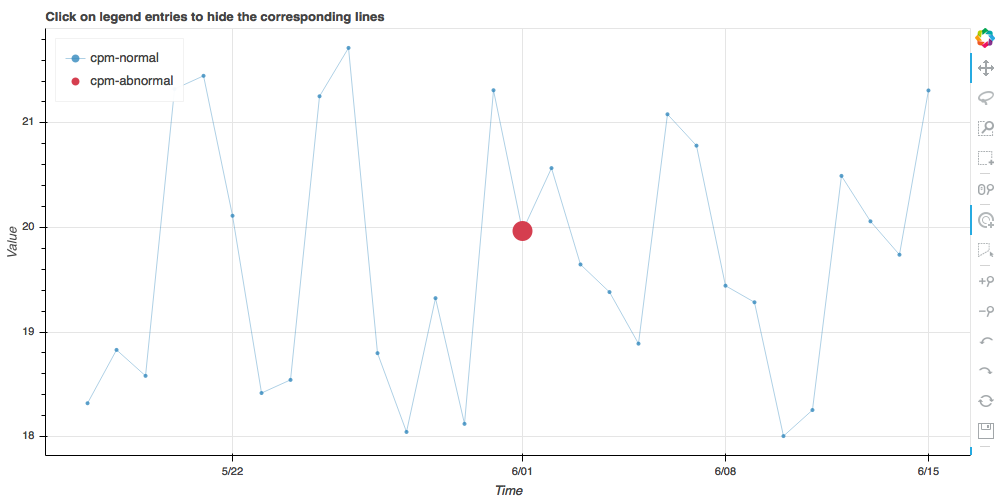

In [35]:
from PIL import Image

img = Image.open(pic_name)
img

In [44]:
type(img)

PIL.PngImagePlugin.PngImageFile

In [ ]:
def get_screenshot_as_png(obj, driver=None, **kwargs):
    ''' Get a screenshot of a LayoutDOM object.

    Args:
        obj (LayoutDOM or Document) : a Layout (Row/Column), Plot or Widget
            object or Document to export.

        driver (selenium.webdriver) : a selenium webdriver instance to use
            to export the image.

    Returns:
        cropped_image (PIL.Image.Image) : a pillow image loaded from PNG.

    .. warning::
        Responsive sizing_modes may generate layouts with unexpected size and
        aspect ratios. It is recommended to use the default ``fixed`` sizing mode.

    '''
    Image = import_required('PIL.Image',
                            'To use bokeh.io.export_png you need pillow ' +
                            '("conda install pillow" or "pip install pillow")')

    with _tmp_html() as tmp:
        html = get_layout_html(obj, **kwargs)
        with io.open(tmp.path, mode="w", encoding="utf-8") as file:
            file.write(decode_utf8(html))

        web_driver = driver if driver is not None else create_webdriver()

        try:
            web_driver.get("file:///" + tmp.path)
            web_driver.maximize_window()

            ## resize for PhantomJS compat
            web_driver.execute_script("document.body.style.width = '100%';")

            wait_until_render_complete(web_driver)

            png = web_driver.get_screenshot_as_png()

            b_rect = web_driver.execute_script(_BOUNDING_RECT_SCRIPT)
        finally:
            if driver is None: # only quit webdriver if not passed in as arg
                terminate_webdriver(web_driver)

    image = Image.open(io.BytesIO(png))
    cropped_image = _crop_image(image, **b_rect)

    return cropped_image